In [1]:
import os
import array
import numpy as np
import matplotlib.pyplot as plt

from Common.CommonHelper import CommonHelper

from ROOT import TFile, TTree, TH2F, TCanvas

Welcome to JupyROOT 6.16/00


In [2]:
import matplotlib as mpl

In [3]:
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = "medium"

In [4]:
def SFPlot(path,Data,MC):
    fileName = 'sf_photon.root'
    path = os.path.join(path,fileName)
    print(path)
    
    File = TFile(path,'recreate')
    tree = TTree('tree_SF','tree_SF')


    hist2d = TH2F("SF","SF",
                  ptNBins,ptBins,
                  etaNBins,etaBins)

    tree.Branch("sf",hist2d,"TH2F")
    #hist2d.SetAxisRange(0,1,"Z")
    #hist2d.SetAxisRange(0,2,"Z")
    
    SF = {}

    for i in range(1,len(ptBins)):
        SF[i] = {}
        for j in range(1,len(etaBins)):
            data = Data.GetBinContent(i,j)
            mc = MC.GetBinContent(i,j)        
            if mc == 0:
                SF[i][j] = 1
            else:
                SF[i][j] = data/mc

            #print(ptBins[i],etaBins[j],data,mc)
            print(i,j,data,mc,SF[i][j])            
            hist2d.SetBinContent(i,j,SF[i][j])
            tree.Fill()

    c = TCanvas()
    hist2d.GetZaxis().SetRangeUser(0.975,1.32)
    hist2d.Draw("COLZ text")
    c.Draw()  
    
    File.Write()
    File.Close()
    
    return SF
    
def SFFill(SF):
    SF = {}

    for i in range(1,len(ptBins)):
        SF[i] = {}
        for j in range(1,len(etaBins)):
            data = Data.GetBinContent(i,j)
            mc = MC.GetBinContent(i,j)        
            if mc == 0:
                SF[i][j] = 1
            else:
                SF[i][j] = data/mc

            #print(ptBins[i],etaBins[j],data,mc)
            print(i,j,data,mc,SF[i][j])            
            hist2d.SetBinContent(i,j,SF[i][j])
            tree.Fill()

    c = TCanvas()
    hist2d.GetZaxis().SetRangeUser(0.975,1.32)
    hist2d.Draw("COLZ text")
    c.Draw()  
    
    File.Write()
    File.Close()

In [5]:
def SFStat(SF,MC,dMC,DATA,dDATA):
    #MC = MC if MC != 0 else 1
    #DATA = DATA if DATA != 0 else 1
    return SF*np.sqrt((dDATA/DATA)**2 + (dMC/MC)**2)

In [6]:
#ptBins  = array.array('f',[0,20,40,50,90,150,500])
#ptBins  = array.array("f",[10,20,35,50,90,150,500])
ptBins = array.array("f",[15.0, 20.0, 35.0, 50.0, 90.0, 150.0, 1500.0])
#ptBins = array.array("f",[15.0, 20.0, 35.0, 50.0, 90.0, 150.0])

#etaBins = array.array("f",[-2.5,-2,-1.566,-1.4442,-1.0,0,1.0,1.4442,1.566,2,2.5])
#etaBins = array.array("f",[-2.5,-1.566,-1.4442,0,1.4442,1.566,2.5])
#etaBins = array.array("f",[0,1.4442,1.566,2.5])
etaBins = array.array("f",[0,1.4442,2.5])

ptNBins, etaNBins  = len(ptBins)-1, len(etaBins)-1

ptC = CommonHelper.Plot.BinFormat(ptBins,Type='center')
ptL = [str(ptL) for ptL in CommonHelper.Plot.BinFormat(ptBins)]
etaB = [[0,1.4442],[1.566, 2.5]]
etaC = CommonHelper.Plot.BinFormat(etaB,Type='center')
etaL = ['EB','EE']
etaErr = [0.7221,0.467]

In [7]:
def Axis():
    ptC = CommonHelper.Plot.BinFormat(ptBins,Type='center')
    ptL = [str(ptL) for ptL in CommonHelper.Plot.BinFormat(ptBins)]
    etaB = [[0,1.4442],[1.566, 2.5]]
    etaC = CommonHelper.Plot.BinFormat(etaB,Type='center')
    etaL = ['EB','EE']
    etaErr = [0.7221,0.467]

In [8]:
def PlotSFEta(SF):
    var,datamc = 'eta','sf'

    plt.figure(figsize=(8,8))
    for i in range(1,len(ptBins)):
        plt.errorbar(etaC,np.array([SF[i][j] for j in range(1,len(etaBins))]),
                    xerr = etaErr,
                    yerr = np.array([SFStat(SF[i][j],
                                            MC.GetBinContent(i,j) ,
                                            MCStat.GetBinContent(i,j),
                                            Data.GetBinContent(i,j),
                                            DataStat.GetBinContent(i,j),
                                           ) for j in range(1,len(etaBins))]),
                     linestyle = '',
                     label = str(ptL[i-1]),
                    )


    plt.legend()
    
    ax = plt.gca()
    ax.set_title('Scale Factors')
    ax.set_xlim([0,2.5])
    ax.set_xlabel('eta')
    
    FigName = 'sf_'+EffType+'_'+var+'Range'+'.png'
    plt.savefig(os.path.join(pathfig,FigName))

In [9]:
def PlotSFPt(SF):
    var = 'pt'

    plt.figure(figsize=(8,8))
    for j in range(1,len(etaBins)):
        plt.errorbar(ptC,np.array([SF[i][j] for i in range(1,len(ptBins))]),
                    xerr = np.diff(ptBins)/2,
                    yerr = np.array([SFStat(SF[i][j],
                                            MC.GetBinContent(i,j),
                                            MCStat.GetBinContent(i,j),
                                            Data.GetBinContent(i,j),
                                            DataStat.GetBinContent(i,j),
                                           ) for i in range(1,len(ptBins))]), 
                     linestyle = '',
                     label = str(etaL[j-1]),
                    )

    plt.legend()
    ax = plt.gca()
    ax.set_title('Scale Factors')
    ax.set_xlabel('Pt')

    FigName = 'sf_'+EffType+'_'+var+'Range'+'.png'
    plt.savefig(os.path.join(pathfig,FigName))

In [10]:
def PlotEff(var,datamc):
    ptC = CommonHelper.Plot.BinFormat(ptBins,Type='center')
    ptL = [str(ptl) for ptl in CommonHelper.Plot.BinFormat(ptBins)]
    ptErr = np.diff(ptBins)/2
    
    etaB = [[0,1.4442],[1.566, 2.5]]
    etaC = CommonHelper.Plot.BinFormat(etaB,Type='center')
    etaL = ['EB','EE']
    etaErr = [0.7221,0.467]
    
    
    if var == 'eta':
        binC = etaC
        bins1 = ptBins
        bins2 = etaBins
        Labels = ptL
        xerr = etaErr
    else:
        binC = ptC
        bins2 = ptBins
        bins1 = etaBins
        Labels = etaL
        xerr = ptErr

        
    if datamc == 'data':
        Eff = Data
        Stat = DataStat
    else:
        Eff = MC
        Stat = MCStat

    plt.figure(figsize=(8,8))
    for i in range(1,len(bins1)):
        yerr = np.array([Stat.GetBinContent(i,j) for j in range(1,len(bins2))])
        binContent = np.array([Eff.GetBinContent(i,j) for j in range(1,len(bins2))])
        
        plt.errorbar(binC,binContent,
                     xerr = xerr,
                     yerr = yerr,
                     linestyle = '',
                     label = str(Labels[i-1]),
                    )
    ax = plt.gca()
    if var == 'eta':
        ax.set_xlim([0,2.5])
    else:
        ax.set_xscale('log')

    ax.set_title('Efficiency '+datamc)
    ax.set_xlabel(var)
    
    plt.legend()
    FigName = 'sf_'+EffType+'_'+var+'Range_'+datamc+'Eff'+'.png'
    plt.savefig(os.path.join(pathfig,FigName))



# Reader File

ProbeTrigPass Name: /home/jcordero/CMS/SMP_ZGamma/histo/2018/ee/20200706/ProbeTrigPass/eff_mc.root Title: 
/home/jcordero/CMS/SMP_ZGamma/histo/2018/ee/20200706/ProbeTrigPass/sf_photon.root
1 1 0.9134884476661682 0.774635374546051 1.179249589784726
1 2 0.886624276638031 0.7411984801292419 1.196203581641764
2 1 0.8983625173568726 0.8554686307907104 1.0501408058954953
2 2 0.9236249923706055 0.8729172945022583 1.0580899223645934
3 1 0.8888567686080933 0.892982542514801 0.9953797821230762
3 2 0.9078767895698547 0.9138671159744263 0.9934450793776683
4 1 0.8662223219871521 0.9098844528198242 0.9520135433709646
4 2 0.9322851300239563 0.9259209036827087 1.0068734017300343
5 1 0.9113331437110901 0.9217151403427124 0.9887362199260803
5 2 0.8951204419136047 0.9420849680900574 0.9501483117051889
6 1 0.9132954478263855 0.943487823009491 0.967999189341099
6 2 0.9578486680984497 0.9543010592460632 1.003717494409143
{1: {1: 1.179249589784726, 2: 1.196203581641764}, 2: {1: 1.0501408058954953, 2: 1.05808

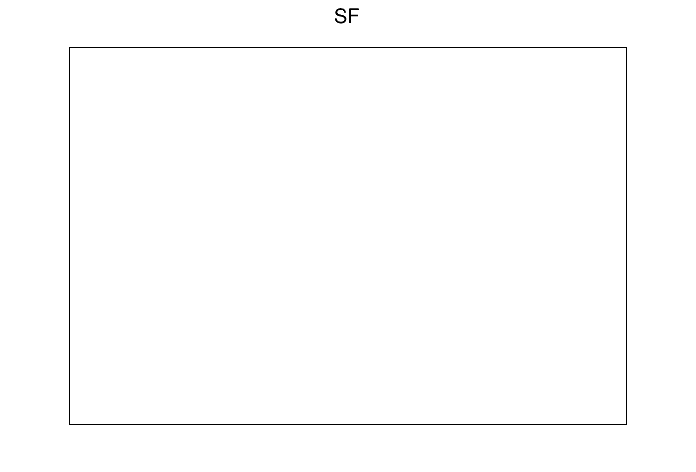

In [11]:
#path = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Efficiency/zee/"
path = '/home/jcordero/CMS/SMP_ZGamma/histo/2018/ee/20200706/'
pathfig = '/home/jcordero/CMS/SMP_ZGamma/fig/2018/ee/20200706/sf_eff/'

#EffType = "ProbeIDPass"
#EffType = "ProbeISOPass"
#EffType = "ProbeWorstPass"
#EffType = "ProbeSigPass"
#EffType = "ProbeIsConv"

#EffTypeList = ["ProbeTrigPass",
#               "ProbeIDPass",
#               "ProbeISOPass",
#               "ProbeWorstPass",]
#               #"ProbeSigPass"]
#               #,"ProbeIsConv",]

EffTypeList = ["ProbeTrigPass",]
for EffType in EffTypeList:
    fileName = 'eff.root'
    fileData = TFile(os.path.join(path,EffType,fileName))

    fileName = 'eff_mc.root'
    fileMC   = TFile(os.path.join(path,EffType,fileName))

    Data     = fileData.Get('EGamma_eff')
    DataStat = fileData.Get('EGamma_eff_stat')
    MC       = fileMC.Get('EGamma_eff')
    MCStat   = fileMC.Get('EGamma_eff_stat')

    print(EffType, fileMC)
    pathSF = os.path.join(path,EffType)
    #SF = SFPlot(pathSF,Data,MC)
    
    #PlotSFPt(SF)
    #PlotSFEta(SF)
    #PlotEff('pt','data')
    #PlotEff('pt','mc')
    #PlotEff('eta','data')
    #PlotEff('eta','mc')
    
    fileName = 'sf_photon.root'
    path = os.path.join(pathSF,fileName)
    print(path)
    #print(Data)
    File = TFile(path,'recreate')
    tree = TTree('tree_SF','tree_SF')
    hist2d = TH2F("SF","SF",
                  ptNBins,ptBins,
                  etaNBins,etaBins)
    tree.Branch("sf",hist2d,"TH2F")
    
    SF = {}
    for i in range(1,len(ptBins)):
        SF[i] = {}
        for j in range(1,len(etaBins)):
            data = Data.GetBinContent(i,j)
            mc = MC.GetBinContent(i,j)        
            if mc == 0:
                SF[i][j] = 1
            else:
                SF[i][j] = data/mc
            #print(ptBins[i],etaBins[j],data,mc)
            print(i,j,data,mc,SF[i][j])            
            hist2d.SetBinContent(i,j,SF[i][j])
            tree.Fill()
    c = TCanvas()
    hist2d.GetZaxis().SetRangeUser(0.975,1.32)
    hist2d.Draw("COLZ text")
    c.Draw()  
    
    File.Write()
    File.Close()
    
    print(SF)


In [12]:
import pandas as pd
sf = pd.DataFrame(SF)

In [13]:
#sf.set_index()
sf.index = ['[0, 1.4442]','[1.566, 2.5]']
sf.columns = [str(pt) for pt in CommonHelper.Plot.BinFormat(ptBins)]

In [14]:
sf

,"[15.0, 20.0]","[20.0, 35.0]","[35.0, 50.0]","[50.0, 90.0]","[90.0, 150.0]","[150.0, 1500.0]"
"[0, 1.4442]",1.179250,1.050141,0.995380,0.952014,0.988736,0.967999
"[1.566, 2.5]",1.196204,1.058090,0.993445,1.006873,0.950148,1.003717


In [15]:
#
from ROOT import TCanvas

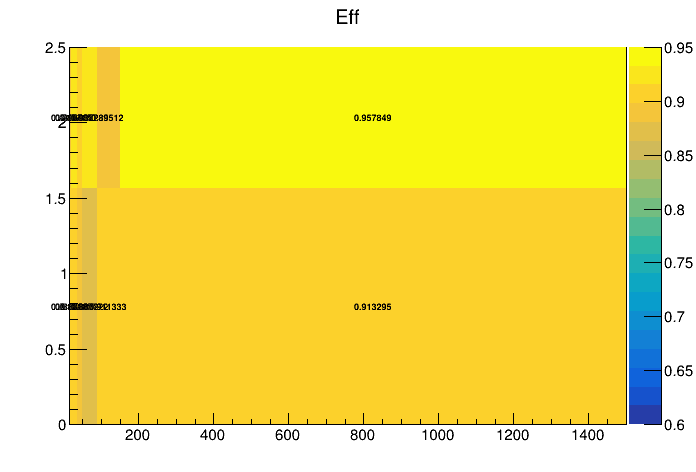

In [16]:
c = TCanvas()
Data.Draw('colz text')
c.Draw()

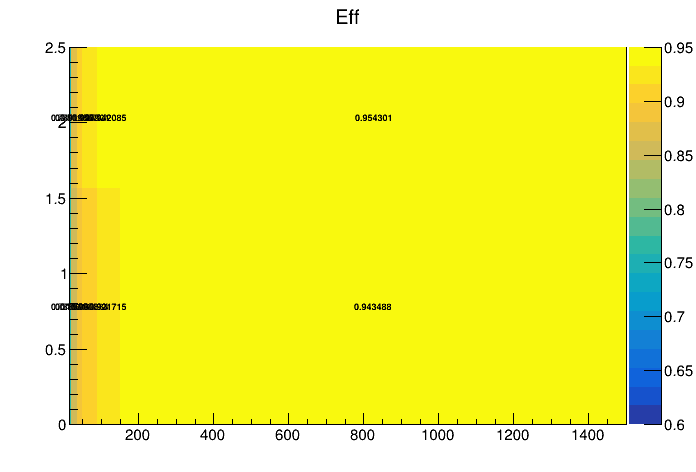

In [17]:
c = TCanvas()
MC.Draw('colz text')
c.Draw()

In [18]:
for i in range(0,7):
    for j in range(0,4):
        print(i,j,Data.GetBinContent(i,j))

0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.0
1 0 0.0
1 1 0.9134884476661682
1 2 0.886624276638031
1 3 0.0
2 0 0.0
2 1 0.8983625173568726
2 2 0.9236249923706055
2 3 0.0
3 0 0.0
3 1 0.8888567686080933
3 2 0.9078767895698547
3 3 0.0
4 0 0.0
4 1 0.8662223219871521
4 2 0.9322851300239563
4 3 0.0
5 0 0.0
5 1 0.9113331437110901
5 2 0.8951204419136047
5 3 0.0
6 0 0.0
6 1 0.9132954478263855
6 2 0.9578486680984497
6 3 0.0


In [19]:
c = TCanvas()
SF.Draw('colz text')
c.Draw()

AttributeError: 'dict' object has no attribute 'Draw'